# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [5]:
%pip install --upgrade plotly

### Import Statements

In [4]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/98data/mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [ ]:
df.shape

(4324, 9)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [ ]:
df.isna().values.any()

True

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4319    False
4320    False
4321    False
4322    False
4323    False
Length: 4324, dtype: bool

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [8]:
df = df.dropna()

In [ ]:
df.isna().values.any()

False

In [9]:
# df.Price = df.Price.replace('\"', '')
# df.Price = df.Price.replace(',', '')
# # df.Price = df.Price.replace('.', ',')
# # df.Price= pd.to_numeric(df.Price, errors='ignore')
# df.Price = df.Price.astype(float)
# # df['Detail = Energiya/Polyus | Polyus Space Station']
df.Price = df.Price.astype('string')
df.Price = df.Price.str.replace(',', '')
df.Price = df.Price.astype('float64')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      964 non-null    int64  
 1   Unnamed: 0.1    964 non-null    int64  
 2   Organisation    964 non-null    object 
 3   Location        964 non-null    object 
 4   Date            964 non-null    object 
 5   Detail          964 non-null    object 
 6   Rocket_Status   964 non-null    object 
 7   Price           964 non-null    float64
 8   Mission_Status  964 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 75.3+ KB


## Descriptive Statistics

In [ ]:
df.describe

<bound method NDFrame.describe of       Unnamed: 0  Unnamed: 0.1  ...  Price Mission_Status
0              0             0  ...   50.0        Success
1              1             1  ...  29.75        Success
3              3             3  ...   65.0        Success
4              4             4  ...  145.0        Success
5              5             5  ...  64.68        Success
...          ...           ...  ...    ...            ...
3855        3855          3855  ...   59.0        Success
3971        3971          3971  ...  63.23        Success
3993        3993          3993  ...  63.23        Success
4000        4000          4000  ...  63.23        Success
4020        4020          4020  ...  63.23        Failure

[964 rows x 9 columns]>

In [ ]:
df.describe()

,Unnamed: 0,Unnamed: 0.1
count,964.00,964.00
mean,858.49,858.49
std,784.21,784.21
min,0.00,0.00
25%,324.75,324.75
50%,660.50,660.50
75%,"1,112.00","1,112.00"
max,"4,020.00","4,020.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [ ]:
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success


In [ ]:
df.Organisation.value_counts()

CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
Eurockot            13
Rocket Lab          13
ILS                 13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
ESA                  1
EER                  1
Sandia               1
Virgin Orbit         1
ExPace               1
Name: Organisation, dtype: int64

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [ ]:
df.Rocket_Status.value_counts()

StatusActive     586
StatusRetired    378
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [ ]:
df.Mission_Status.value_counts()

Success              910
Failure               36
Partial Failure       17
Prelaunch Failure      1
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

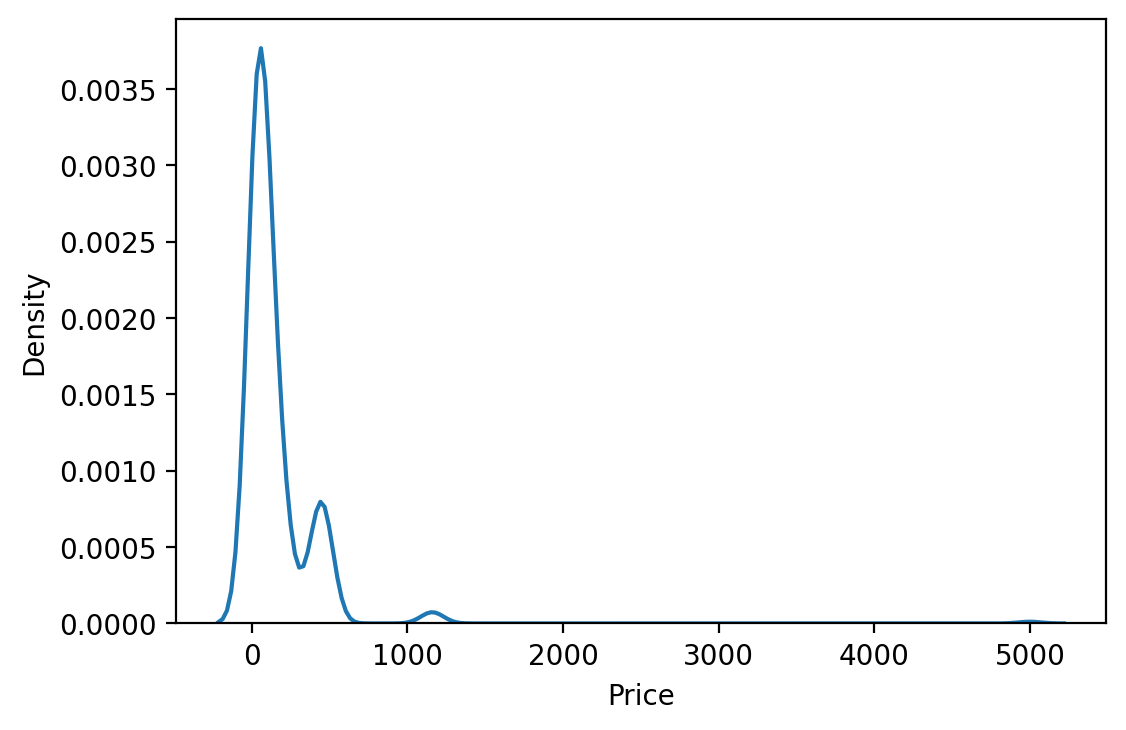

In [ ]:
# hist.show()
plt.figure(dpi=200)
sns.kdeplot(df.Price)
plt.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [10]:
df['Country'] = df.Location.str.split(', ').str[-1]
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC","Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [11]:
df['Country'] = df['Country'].str.replace('New Mexico', 'United States')
df['Country'] = df['Country'].str.replace('Yellow Sea', 'China')
df['Country'] = df['Country'].str.replace('Shahrud Missile Test Site', 'Iran')
df['Country'] = df['Country'].str.replace('Pacific Missile Range Facility', 'United States')
df['Country'] = df['Country'].str.replace('Barents Sea', 'Russia')
df['Country'] = df['Country'].str.replace('Gran Canaria', 'United States')
df['Country'] = df['Country'].str.replace('USA', 'United States')
df['Country'] = df['Country'].str.replace('Russia', 'Russian Federation')
# print(df.head(46))
df_countries = df.groupby(['Country'], as_index=False).agg({'Mission_Status': pd.Series.count})
# df_countries = df.groupby(['Country'], as_index=False)
df_countries = df_countries.sort_values('Mission_Status', ascending=False)
df_countries.head(10)

,Country,Mission_Status
7,United States,490
0,China,159
1,France,95
2,India,67
6,Russian Federation,54
4,Kazakhstan,46
3,Japan,40
5,New Zealand,13


In [ ]:
%pip install pycountry

     |████████████████████████████████| 10.1 MB 4.9 MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746883 sha256=9d67f846bc241013cce785de423b506d9163deefa7a78987ed9b90d2539695d0
  Stored in directory: /root/.cache/pip/wheels/57/e8/3f/120ccc1ff7541c108bc5d656e2a14c39da0d824653b62284c6
Successfully built pycountry


In [ ]:
import pycountry
countries = {}
for country in pycountry.countries:
    countries[country.name] = country.alpha_3
# df['Country'] =  df['Country'].str.strip()
code = {countries.get(country, 'Unknown code'): country  for country in df_countries.Country.str.strip()}
codes = pd.DataFrame(list(code.items()), columns = ['Code', 'Country'])
codes

,Code,Country
0,USA,United States
1,CHN,China
2,FRA,France
3,IND,India
4,RUS,Russian Federation
5,KAZ,Kazakhstan
6,JPN,Japan
7,NZL,New Zealand


In [ ]:
#countries

In [ ]:
# codes.info()
merged_df = pd.merge(df_countries, codes, on='Country')
merged_df

,Country,Mission_Status,Code
0,United States,490,USA
1,China,159,CHN
2,France,95,FRA
3,India,67,IND
4,Russian Federation,54,RUS
5,Kazakhstan,46,KAZ
6,Japan,40,JPN
7,New Zealand,13,NZL


# Use a Choropleth Map to Show the Number of Failures by Country


In [ ]:
world_map = px.choropleth(merged_df,
                          locations='Code',
                          color='Mission_Status',  
                          hover_name='Country',  
                          color_continuous_scale=px.colors.sequential.matter)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [ ]:
country_org_mission = df.groupby(by=['Country', 
                                       'Organisation', 
                                       'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})

In [ ]:
country_org_mission = country_org_mission.sort_values('Detail', ascending=False)
country_org_mission.head(5)

,Country,Organisation,Mission_Status,Detail
2,China,CASC,Success,152
39,United States,NASA,Success,146
49,United States,ULA,Success,97
47,United States,SpaceX,Success,93
6,France,Arianespace,Success,91


In [ ]:
burst = px.sunburst(country_org_mission, 
                    path=['Country', 'Organisation', 'Mission_Status'], 
                    values='Detail',
                    title='Where do lauches Take Place?',
                   )

burst.update_layout(xaxis_title='Number of Launches', 
                    yaxis_title='Organisation',
                    coloraxis_showscale=False)

burst.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [ ]:
df_spent = df.groupby('Organisation').agg({'Price': pd.Series.sum})

In [ ]:
df_spent = df_spent.sort_values('Price', ascending=False)
df_spent

,Price
Organisation,
NASA,"76,280.00"
Arianespace,"16,345.00"
ULA,"14,798.00"
RVSN USSR,"10,000.00"
CASC,"6,340.26"
SpaceX,"5,444.00"
Northrop,"3,930.00"
MHI,"3,532.50"
ISRO,"2,177.00"


# Analyse the Amount of Money Spent by Organisation per Launch

In [ ]:
df_spent2 = df.groupby('Organisation').agg({'Detail': pd.Series.count})
df_spent2 = df_spent2.sort_values('Detail', ascending=False)
df_spent2
# country_org_mission = df.groupby(by=['Country', 
#                                        'Organisation', 
#                                        'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})

,Detail
Organisation,
CASC,158
NASA,149
SpaceX,99
ULA,98
Arianespace,96
Northrop,83
ISRO,67
MHI,37
VKS RF,33


In [ ]:
merged_df2 = pd.merge(df_spent, df_spent2, on='Organisation')

In [ ]:
merged_df2['perLaunch'] =  merged_df2.Price / merged_df2.Detail
merged_df2 = merged_df2.sort_values('perLaunch', ascending=False)
merged_df2

,Price,Detail,perLaunch
Organisation,,,
RVSN USSR,"10,000.00",2,"5,000.00"
NASA,"76,280.00",149,511.95
Boeing,"1,241.00",7,177.29
Arianespace,"16,345.00",96,170.26
ULA,"14,798.00",98,151.00
ILS,"1,320.00",13,101.54
MHI,"3,532.50",37,95.47
Martin Marietta,721.40,9,80.16
US Air Force,"1,550.92",26,59.65


# Chart the Number of Launches per Year

In [12]:
# df['Date'] = df['Date'].astype('string')
# df.info()
# df['Year'] = df['Date'][13:16]
# df['Date'].str.extract(r'M([0-9]{4})')
# df['Date']
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, utc=True)
df['Year'] = df.Date.dt.year
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States,2020
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States,2020
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,2020


In [ ]:
# df_launches = df.groupby('Year').agg({'Detail': pd.Series.count})
df_launches = df.Year.value_counts()
# df_launches = df_launches.sort_values('Detail', ascending=False)
df_launches.sort_values(ascending=False, inplace=True)
df_launches

2018    88
2019    73
2017    66
2016    64
2020    52
2014    41
2015    39
2013    33
2009    31
2010    29
2007    29
2011    29
2008    28
2006    27
2012    25
2003    20
1998    18
1997    18
2004    17
2002    17
1994    16
2000    16
2005    15
1999    14
1996    14
1993    12
1992    12
1990    11
1968    10
1985    10
1995    10
2001    10
1969     8
1967     8
1991     7
1984     6
1989     6
1983     5
1988     5
1982     4
1987     3
1986     3
1966     3
1981     2
1965     2
1964     2
1971     2
1972     2
1970     1
1973     1
Name: Year, dtype: int64

In [ ]:
launches_bar = px.bar(x=df_launches.index,
                  y=df_launches.values,
                  # orientation='h',
                  color=df_launches.values,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Number of Launches per Year')

launches_bar.update_layout(xaxis_title='Years', 
                       yaxis_title='Launches',
                       coloraxis_showscale=False)
launches_bar.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [13]:
# df['Month'] = df.Date.dt.year
df['Month'] = df.Date.dt.month
df.head(5)

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Year,Month
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,United States,2020,8
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,8
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,2020,7
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,United States,2020,7
5,5,5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China,2020,7


In [ ]:
df_launches2 = df.Month.value_counts()
# df_launches = df_launches.sort_values('Detail', ascending=False)
df_launches2.sort_values(ascending=False, inplace=True)
df_launches2

12    92
4     91
9     88
5     86
6     85
10    83
8     82
3     77
7     77
11    77
1     66
2     60
Name: Month, dtype: int64

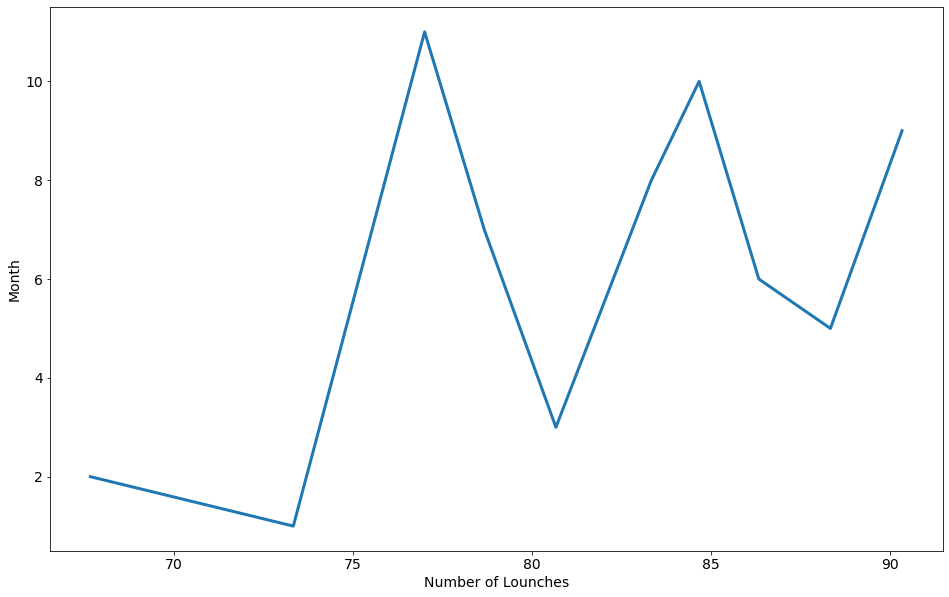

In [ ]:
roll_df = df_launches2.rolling(window=3).mean()
# roll_df = df_launches2
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Month', fontsize=14)
plt.xlabel('Number of Lounches', fontsize=14)
# plt.ylim(50, 100)

# plot the roll_df instead
# for column in roll_df.columns:
plt.plot(roll_df.values, roll_df.index, linewidth=3)


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [ ]:
df_launches2.head(1)

12    92
Name: Month, dtype: int64

In [ ]:
df_launches2.tail(1)

2    60
Name: Month, dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [ ]:
# df[['Date', 'Price']]
roll_df = df[['Date', 'Price']]
# roll_df.Date = pd.to_datetime(roll_df.Date)
# reshaped_df = roll_df.pivot(index='Date', values='Price')
# reshaped_df
roll_df = roll_df.set_index('Date')
roll_df = roll_df.rolling(window=6).mean()
roll_df

,Price
Date,
"Fri Aug 07, 2020 05:12 UTC",nan
"Thu Aug 06, 2020 04:01 UTC",nan
"Thu Jul 30, 2020 21:25 UTC",nan
"Thu Jul 30, 2020 11:50 UTC",nan
"Sat Jul 25, 2020 03:13 UTC",nan
...,...
"Fri Jul 29, 1966 18:43 UTC",59.00
"Thu May 06, 1965 15:00 UTC",59.71
"Thu Feb 11, 1965 15:19 UTC",60.41


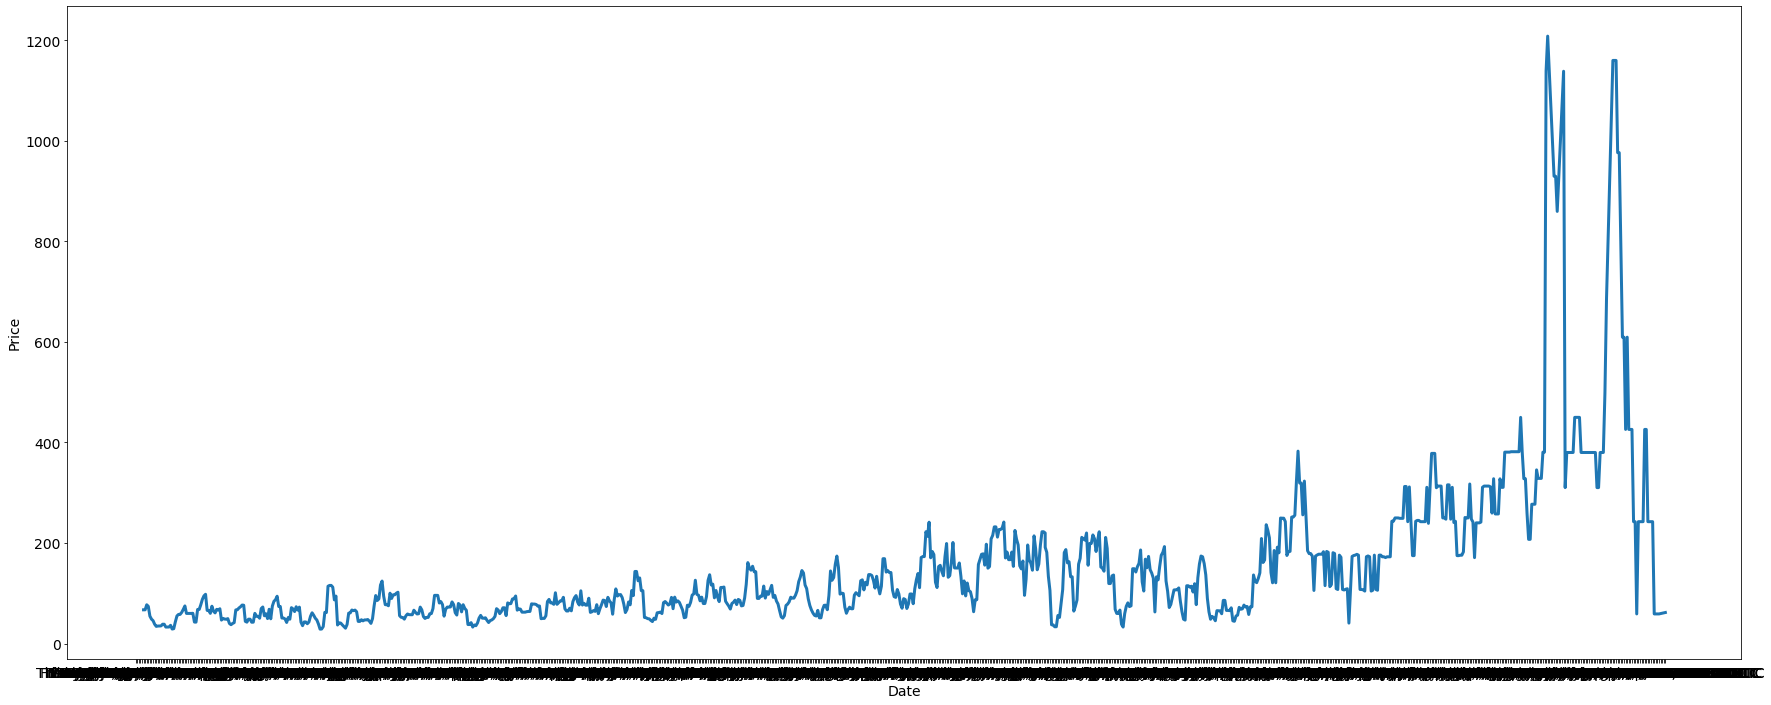

In [ ]:
plt.figure(figsize=(30,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
# plt.ylim(0, 1500)
plt.plot( roll_df.Price, linewidth=3)

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [ ]:
df9 = df.groupby(by=['Organisation'], as_index=False).agg({'Price': pd.Series.sum})
df9 = df9.sort_values('Price', ascending=False)
df9 = df9.head(9)
df9

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"


In [ ]:
df10 = df.groupby(by=['Organisation', 'Year'], as_index=False).agg({'Price': pd.Series.sum})
df10 = df10.sort_values('Year', ascending=True)
# df10 = df10.set_index('Year')
df10

,Organisation,Year,Price
246,US Air Force,1964,126.46
247,US Air Force,1965,126.46
248,US Air Force,1966,177.00
141,NASA,1967,"1,160.00"
249,US Air Force,1967,413.00
...,...,...,...
211,Rocket Lab,2020,22.50
216,Roscosmos,2020,210.50
231,SpaceX,2020,650.00
98,JAXA,2020,90.00


In [ ]:
merged_df3 = pd.merge(df10, df9, on='Organisation')
merged_df3 = merged_df3.set_index('Year')
merged_df3.columns

Index(['Organisation', 'Price_x', 'Price_y'], dtype='object')

In [ ]:
merged_df3[merged_df3['Organisation'] == 'NASA']

,Organisation,Price_x,Price_y
Year,,,
1967,NASA,"1,160.00","76,280.00"
1968,NASA,"2,320.00","76,280.00"
1969,NASA,"4,640.00","76,280.00"
1970,NASA,"1,160.00","76,280.00"
1971,NASA,"2,320.00","76,280.00"
1972,NASA,"2,320.00","76,280.00"
1973,NASA,"1,160.00","76,280.00"
1981,NASA,900.00,"76,280.00"
1982,NASA,"1,350.00","76,280.00"


In [ ]:
list(merged_df3['Organisation'].unique())

['NASA',
 'CASC',
 'RVSN USSR',
 'Northrop',
 'ISRO',
 'MHI',
 'Arianespace',
 'SpaceX',
 'ULA']

No handles with labels found to put in legend.


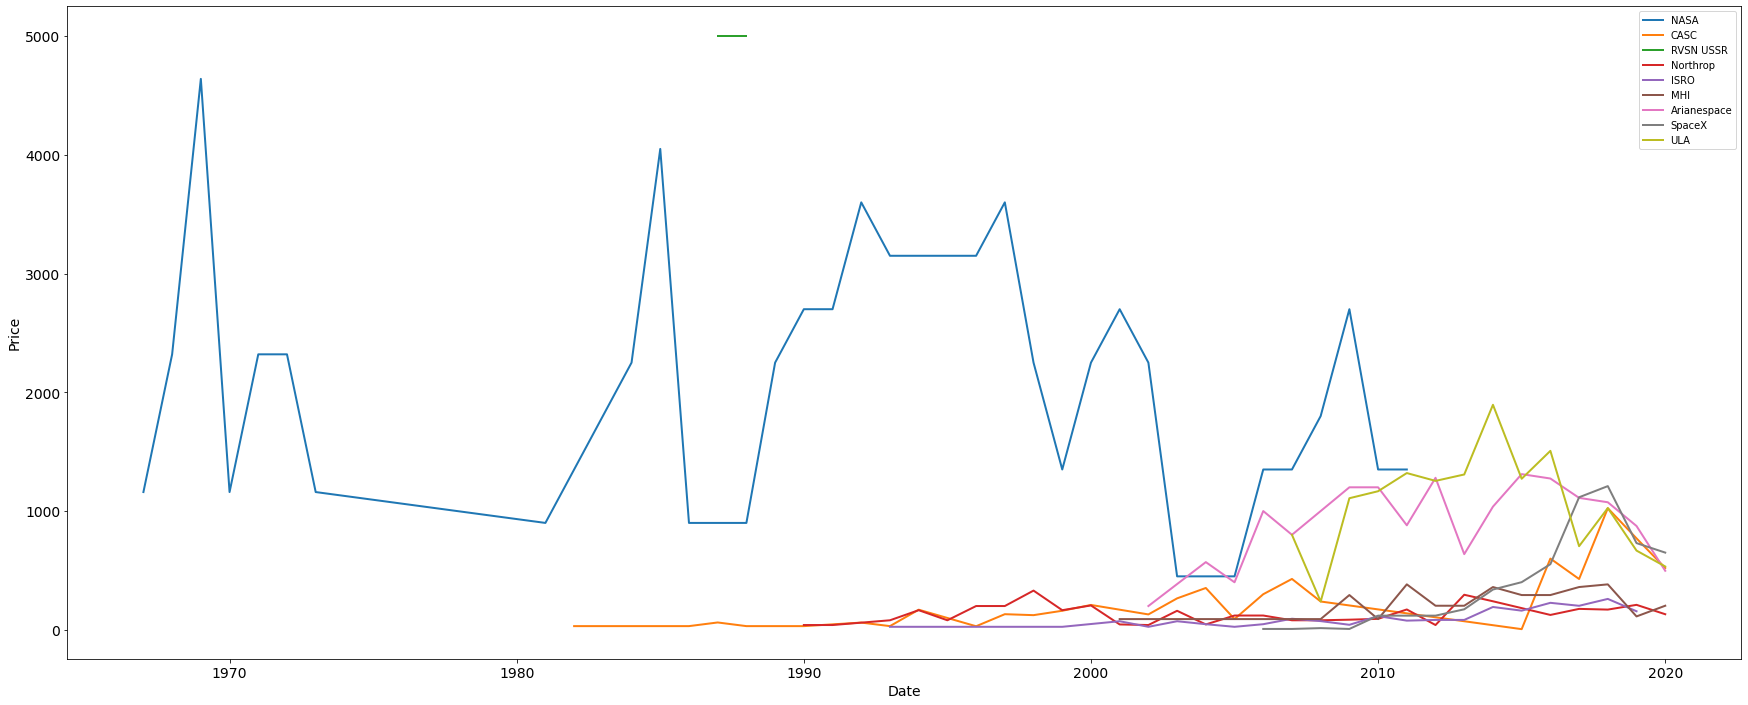

In [ ]:
plt.figure(figsize=(30,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
# plt.ylim(0, 1500)
# plt.plot( merged_df3[merged_df3['Organisation'] == 'NASA'].Price_x, linewidth=3)
for variable in merged_df3['Organisation'].unique():
    plt.plot( merged_df3[merged_df3['Organisation'] == variable].Price_x, linewidth=2)
plt.legend(fontsize=16)
plt.legend(merged_df3['Organisation'].unique())
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [14]:
# country_org_mission = df.groupby(by=['Country', 
#                                        'Organisation', 
#                                        'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})
df12 = df
df12['Country'] = df['Country'].str.replace('Kazakhstan', 'Russian Federation')
df11 = df12.groupby(by=['Country', 'Year'], as_index=False).agg({'Price': pd.Series.sum})
df11 = df11.sort_values('Year', ascending=True)
# df11 = df11[(df11['Country'] == 'United States') or (df11['Country'] == 'Russian Federation')] 
df11.drop(df11.index[df11['Country'] == 'China'], inplace=True)
df11.drop(df11.index[df11['Country'] == 'India'], inplace=True)
df11.drop(df11.index[df11['Country'] == 'New Zealand'], inplace=True)
df11.drop(df11.index[df11['Country'] == 'France'], inplace=True)
df11.drop(df11.index[df11['Country'] == 'Japan'], inplace=True)
# df9 = df9.head(9)
df11 = df11.set_index('Year')
df11

,Country,Price
Year,,
1964,United States,126.46
1965,United States,126.46
1966,United States,177.00
1967,United States,"1,573.00"
1968,United States,"2,792.00"
...,...,...
2018,Russian Federation,491.10
2019,Russian Federation,748.10
2019,United States,"1,607.00"


No handles with labels found to put in legend.


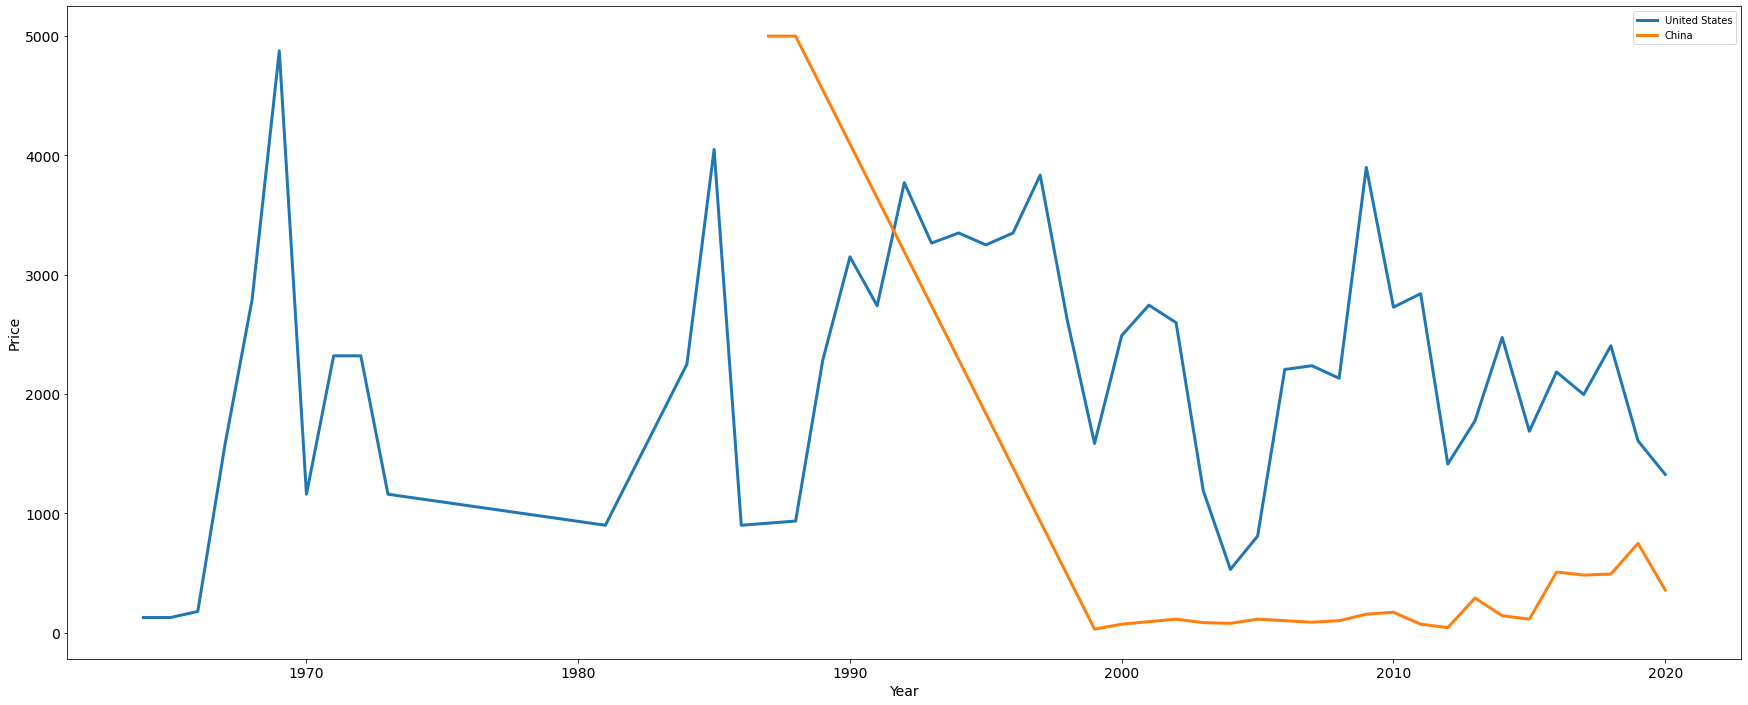

In [ ]:
plt.figure(figsize=(30,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
# plt.ylim(0, 1500)
plt.plot( df11[df11['Country'] == 'United States'].Price, linewidth=3)
plt.plot( df11[df11['Country'] == 'Russian Federation'].Price, linewidth=3)
# for variable in merged_df3['Organisation'].unique():
#     plt.plot( merged_df3[merged_df3['Organisation'] == variable].Price_x, linewidth=2)
plt.legend(fontsize=16)
plt.legend(df11['Country'].unique())
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [ ]:
df13 = df11.groupby(by=['Country'], as_index=False).agg({'Price': pd.Series.count})
df13

,Country,Price
0,Russian Federation,23.00
1,United States,49.00


In [ ]:
# df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
# df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df13, values='Price', names='Country', title='The total number of launches')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [ ]:
# df11
df14 = df11.groupby(by=['Country', 'Year'], as_index=False).agg({'Price': pd.Series.count})
df14.head(5)

,Country,Price
0,Russian Federation,1.00
1,Russian Federation,1.00
2,Russian Federation,1.00
3,Russian Federation,1.00
4,Russian Federation,1.00


## Chart the Total Number of Mission Failures Year on Year.

In [15]:
df15 = df.groupby(by=['Year', 'Mission_Status'], as_index=False).agg({'Detail': pd.Series.count})
df16 = df15
# df15 = df15.set_index('Year')
df15 = df15[df15['Mission_Status'] == 'Failure']
df15 = df15.drop(columns=['Mission_Status'])
df15

,Year,Detail
0,1964,1
4,1967,1
19,1986,1
24,1990,1
29,1993,2
31,1994,1
34,1995,2
36,1996,1
43,2001,1
46,2002,1


In [ ]:
launches_bar = px.bar(x=df15.Year, y=df15.Detail, 
                  orientation='v',
                  color=df15.Detail,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Total Number of Mission Failures')

launches_bar.update_layout(xaxis_title='Years', 
                       yaxis_title='Number',
                       coloraxis_showscale=False)
launches_bar.show()

# plt.figure(figsize=(30,12))
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# plt.xlabel('Year', fontsize=14)
# plt.ylabel('Total Number of Mission Failures', fontsize=14)
# # plt.ylim(0, 1500)
# plt.box( df11[df11['Mission_Status'] == 'Failure'].Price)
# # for variable in merged_df3['Organisation'].unique():
# #     plt.plot( merged_df3[merged_df3['Organisation'] == variable].Price_x, linewidth=2)
# # plt.legend(fontsize=16)
# # plt.legend(df11['Country'].unique())
# plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [16]:
df16['Mission_Status'] = df16['Mission_Status'].str.replace('Partial Failure', 'Failure')
df16['Mission_Status'] = df16['Mission_Status'].str.replace('Prelaunch Failure', 'Failure')
df16 = df16.groupby(by=['Year', 'Mission_Status'], as_index=False).agg({'Detail': pd.Series.sum})
# df[df.Year == 2020]
# df16[df16.Year == 2020]
df16s = df16[df16.Mission_Status == 'Success']
df16f = df16[df16.Mission_Status != 'Success']
df17 = pd.merge(df16s, df16f, on='Year')
df17['Percentage'] = df17.Detail_y*100/df17.Detail_x
df17

,Year,Mission_Status_x,Detail_x,Mission_Status_y,Detail_y,Percentage
0,1964,Success,1,Failure,1,100.00
1,1967,Success,6,Failure,2,33.33
2,1968,Success,9,Failure,1,11.11
3,1986,Success,2,Failure,1,50.00
4,1990,Success,10,Failure,1,10.00
5,1991,Success,6,Failure,1,16.67
6,1993,Success,10,Failure,2,20.00
7,1994,Success,13,Failure,3,23.08
8,1995,Success,8,Failure,2,25.00
9,1996,Success,13,Failure,1,7.69


In [ ]:
launches_bar = px.bar(x=df17.Year, y=df17.Percentage, 
                  orientation='v',
                  color=df17.Percentage,
                  color_continuous_scale=px.colors.sequential.Plasma,
                  title='Failures over Time')

launches_bar.update_layout(xaxis_title='Years', 
                       yaxis_title='Number',
                       coloraxis_showscale=False)
launches_bar.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [33]:
df18 = df.groupby(by=['Year', 'Country'], as_index=False).agg({'Detail': pd.Series.count})
df18 = df18.set_index('Year')
df18.head(50)
# df18['Country'].unique()

,Country,Detail
Year,,
1964,United States,2
1965,United States,2
1966,United States,3
1967,United States,8
1968,United States,10
1969,United States,8
1970,United States,1
1971,United States,2
1972,United States,2


No handles with labels found to put in legend.


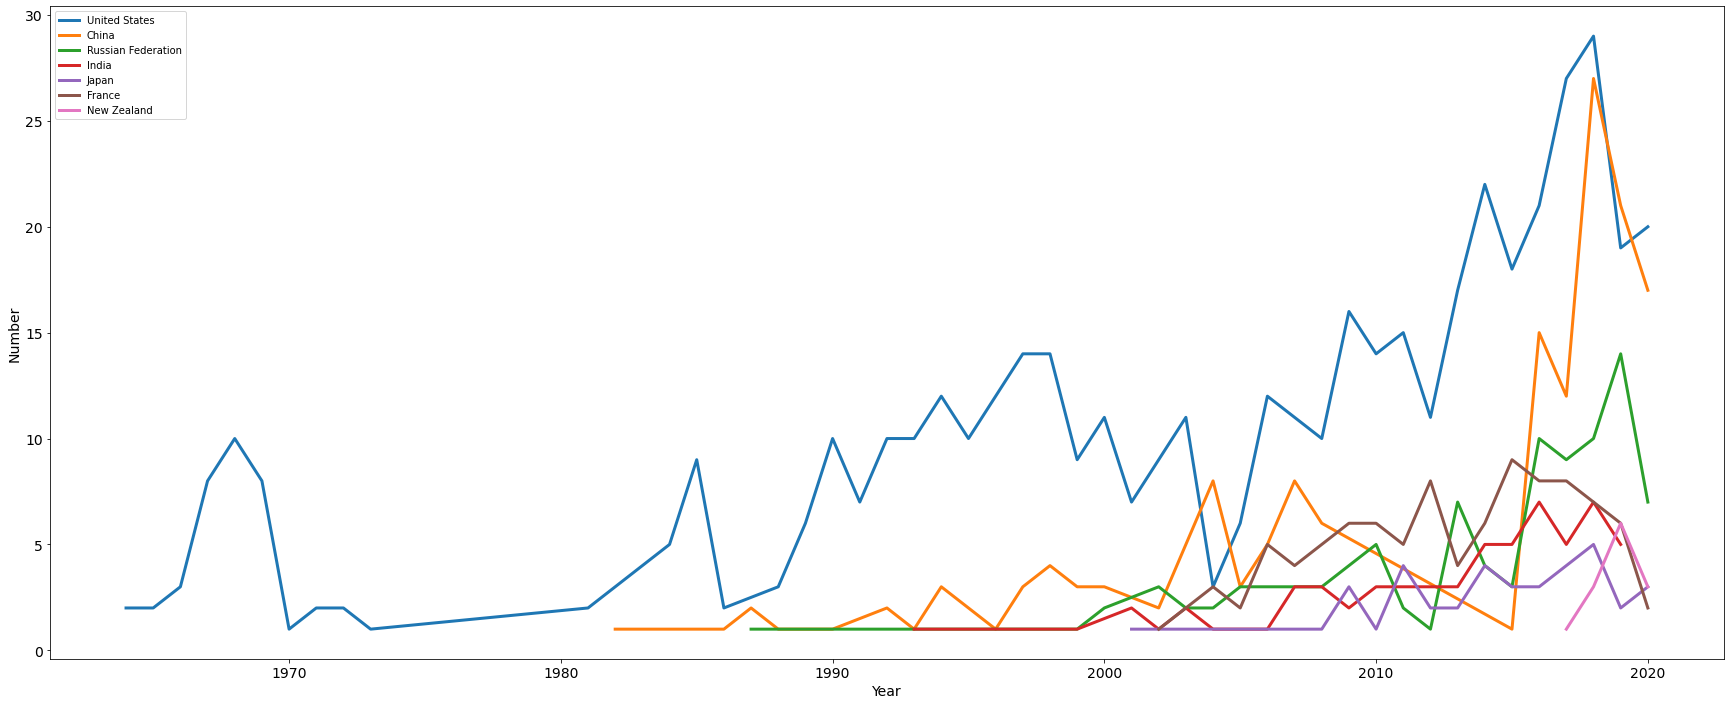

In [34]:
plt.figure(figsize=(30,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number', fontsize=14)
# plt.ylim(0, 1500)
for i in df18['Country'].unique():
  plt.plot( df18[df18['Country'] == i].Detail, linewidth=3)
# plt.plot( df18[df18['Country'] == 'Russian Federation'].Detail, linewidth=3)
# for variable in merged_df3['Organisation'].unique():
#     plt.plot( merged_df3[merged_df3['Organisation'] == variable].Price_x, linewidth=2)
plt.legend(fontsize=16)
plt.legend(df18['Country'].unique())
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [31]:
df19 = df.groupby(by=['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})
df19 = df19.set_index('Year')
df19.head(15)

,Organisation,Detail
Year,,
1964,US Air Force,2
1965,US Air Force,2
1966,US Air Force,3
1967,NASA,1
1967,US Air Force,7
1968,NASA,2
1968,US Air Force,8
1969,NASA,4
1969,US Air Force,4


No handles with labels found to put in legend.


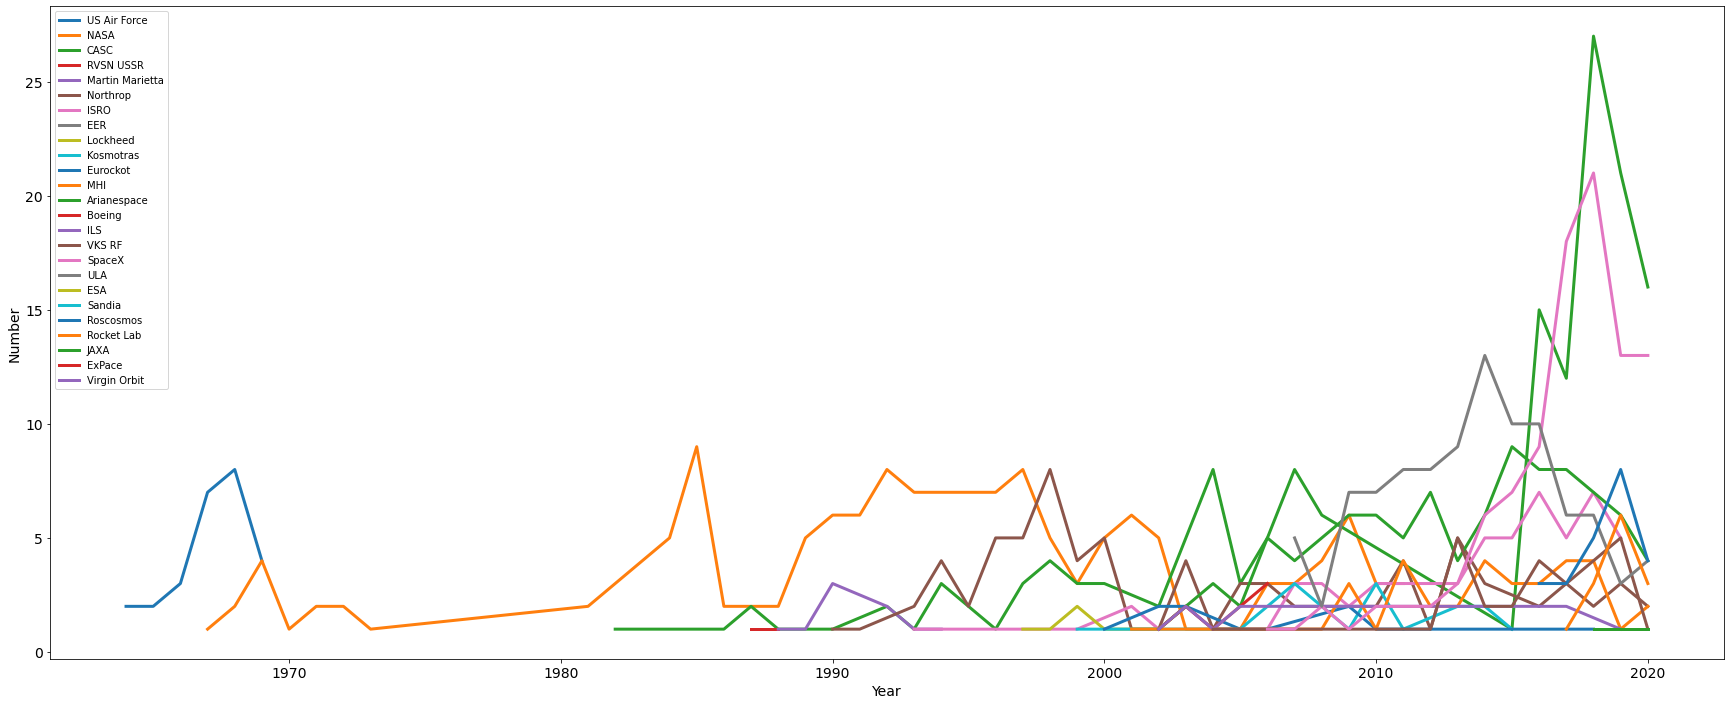

In [32]:
plt.figure(figsize=(30,12))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number', fontsize=14)

# plt.ylim(0, 1500)
for i in df19['Organisation'].unique():
  plt.plot( df19[df19['Organisation'] == i].Detail, linewidth=3)
# plt.plot( df18[df18['Country'] == 'Russian Federation'].Detail, linewidth=3)
# for variable in merged_df3['Organisation'].unique():
#     plt.plot( merged_df3[merged_df3['Organisation'] == variable].Price_x, linewidth=2)
plt.legend(fontsize=16)
plt.legend(df19['Organisation'].unique())
plt.show()